In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
# read churn_modelling data
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")
print(df.shape)
df.head(2)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
# check null values, duplicate rows, target_variable distribution
df.isnull().sum() # no nulls
df.duplicated().sum() # no duplicates
df.Exited.value_counts() # 7963:2037 :: 0:1
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [7]:
# One hot encoding for Geography and Gender
df = pd.get_dummies(df, columns = ['Geography','Gender'],drop_first=True)
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False


In [8]:
# drop rownumber, customerid, surname
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.0,1,1,1,101348.88,1,False,False,False


In [13]:
# Split data into train and test
X= df.drop(columns=['Exited'])
y= df.Exited.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0, stratify = y)

# Scale values so that convergence happes fast
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # creating instance of standardscaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-1.24021723,  0.77986083,  0.35390313, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.75974873, -0.27382717,  0.35390313, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [-1.72725557, -0.9443559 , -0.3390904 , ..., -0.57812007,
        -0.57504086, -1.09665089],
       ...,
       [-0.51484098,  0.87565065,  1.39339343, ...,  1.72974448,
        -0.57504086,  0.91186722],
       [ 0.73902369, -0.36961699, -1.03208393, ..., -0.57812007,
        -0.57504086, -1.09665089],
       [ 0.95663657, -1.32751517,  0.35390313, ..., -0.57812007,
         1.73900686,  0.91186722]])

In [34]:
# X_train.shape # 8000,11
# type(X_train) # pandas.core.frame.DataFrame  
# type(X_train_scaled) # numpy.ndarray
X_train_scaled[0]

array([-1.24021723,  0.77986083,  0.35390313, -1.23451386, -0.90298067,
       -1.54963239, -1.03849022,  1.64099027, -0.57812007, -0.57504086,
       -1.09665089])

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [80]:
# Create object of Sequential model and add layers
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# assigning loss_function, optimiser to the model; show accuracy for each epoch
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
# Fit the model, assign epochs (# of times to iterate), 
# validation split (split train data into validation set to do validation in parallel for 20% data)

# Store data in a history dictionary
history = model.fit(X_train_scaled,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5759 - accuracy: 0.7269 - val_loss: 0.4637 - val_accuracy: 0.8119
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8008 - val_loss: 0.4196 - val_accuracy: 0.8150
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8116 - val_loss: 0.4005 - val_accuracy: 0.8181
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8181 - val_loss: 0.3876 - val_accuracy: 0.8225
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8284 - val_loss: 0.3767 - val_accuracy: 0.8300
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.8386 - val_loss: 0.3683 - val_accuracy: 0.8419
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8484 - val_loss: 0.3644 - val_accuracy: 0.8438
Epoch 

In [84]:
### history has 4 dictionaries {train_loss:values , train accuracy:values, val_loss:values, val_accuracy:values}
### Plot the graphs of train loss, train accuracy, val_loss, val_accuracy
# history.history 

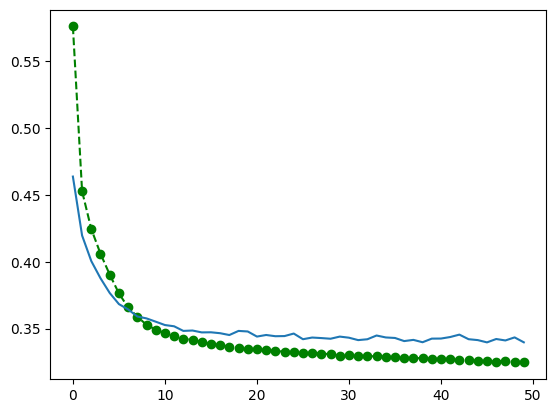

In [85]:
# Plot 4 plots of history; train_loss and val_loss in 1 graph
# train_accuracy and val_accuracy in 1 graph
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='green', marker='o', linestyle='dashed')
plt.plot(history.history['val_loss'])

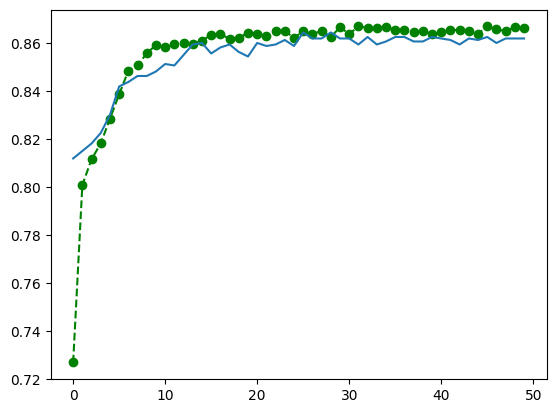

In [86]:
plt.plot(history.history['accuracy'],color='green', marker='o', linestyle='dashed')
plt.plot(history.history['val_accuracy'])

In [87]:
# Get the weights for each layer. 
model.layers[0].get_weights()

[array([[-0.01760388,  0.52471167,  0.482216  , -0.38094345,  0.13918275,
          0.08764146,  0.06540769, -0.08725934,  0.3748602 , -0.2764436 ,
         -0.01863092],
        [-0.61641353, -0.27877906, -0.8221194 , -0.1721937 ,  0.6059804 ,
         -0.72393775, -0.6017023 , -0.49577203,  0.5111171 ,  0.4685951 ,
          0.8581064 ],
        [-0.04467465,  0.16675708, -0.22675534,  0.10897966,  0.01655181,
          0.01110042,  0.31480476, -0.01367429,  0.07320523, -0.01189461,
          0.03828621],
        [-0.02225317,  0.2308152 ,  0.06858285,  0.02198841, -0.23870721,
         -0.3452115 ,  0.13891919, -0.5929912 , -1.2034591 ,  0.09611183,
         -0.08740007],
        [ 0.40520817, -0.3793431 , -0.02082527,  1.2509674 , -0.5015084 ,
         -0.10143212, -0.3130816 , -0.2320047 , -0.07478795, -0.17466734,
          1.1621697 ],
        [ 0.07234374, -0.01183977, -0.20786186, -0.19194792,  0.08973129,
          0.22906487, -0.10044597,  0.0067121 , -0.38195077,  0.2041675

In [89]:
model.layers[-1].get_weights()

[array([[-0.81524616],
        [ 0.9649022 ],
        [-0.3579608 ],
        [ 0.30807576],
        [-0.743959  ],
        [-0.5381192 ],
        [ 1.1116837 ],
        [ 1.3493129 ],
        [-0.24486819],
        [ 0.3949217 ],
        [-0.21124993]], dtype=float32),
 array([-0.09906349], dtype=float32)]

In [90]:
# Predict and take a threshold. Here >0.5 will be 1
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 1ms/step


In [91]:
# Check accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862